## Libraries
   

- numpy allows you to work with high-performance multidimensional array objects and it also provides tools for working with these arrays
  <br><br>
- Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1984,spam,Urgent! Please call 09061743810 from landline....,NaN,NaN,NaN
1130,ham,Howz pain?hope u r fine..,NaN,NaN,NaN
1278,ham,Can i meet Ì_ at 5.. As 4 where depends on whe...,NaN,NaN,NaN
3391,ham,What r u cooking me for dinner?,NaN,NaN,NaN
1546,ham,Shant disturb u anymore... Jia you...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1- Data Cleaning
# 2- EDA
# 3- Text Prepocessing
# 4- Model Building
# 5- Evaluation
# 6- Improvement
# 7- Website
# 8- Deployment

# 1- Data Cleaning

* As we can see in the below table there is unnamed columns, we need to either name them or delete them to clean the data for the future engineering. we are going to delete them for now since there are not a lot of data and probably this will not affect the dataset in the firt place because they are not a lot.This will help to analyse the data efficiently  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


* <font color='red'>Drop</font> function remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.
<br>
<br>
* <font color='red'>Inplace = True </font> If you set inplace = True , the <font color='red'>Drop</font> method will delete rows or columns directly from the original dataframe

In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

* <font color='red'>LabelEncoding</font>  is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

* <font color='red'>fit_transform</font> Fit label encoder and return encoded labels.
<br>
<br>
* This will convert the target to 0 or 1. 0 means that this data is not spam and 1 means that this data is a spam



In [11]:
df['target'] =  encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False
<br>
<br>
* The function dataframe. isnull(). sum(). sum() returns the number of missing values in the dataset.


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

##### Removing The Duplicates

* Determines which duplicates (if any) to keep. 'first' : Drop duplicates except for the first occurrence. 'last' : Drop duplicates except for the last occurrence.

In [15]:
df = df.drop_duplicates(keep='first');

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2- EDA (Exploratory Data Analysis)

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

#### The below data Is Imbalanced !!!
* A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

| Degree of imbalance | Proportion of Minority Class
| --- | --- 
| Mild | 20-40% of the data set 
| Moderate | 1-20% of the data set
| Extreme | <1% of the data set

* In our case we have a moderate imblance degree !!!
<br>
<br>
* having a balanced data set for a model would generate higher accuracy models, higher balanced accuracy and balanced detection rate. Hence, its important to have a balanced data set for a classification model

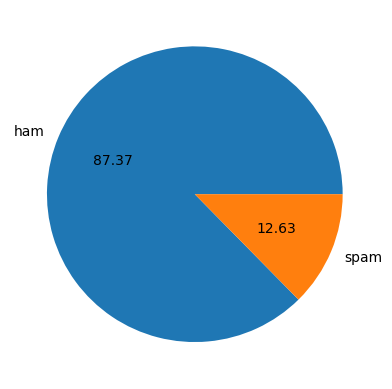

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## NTLK

* NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. A lot of the data that you could be analyzing is unstructured data and contains human-readable text. Before you can analyze that data programmatically, you first need to preprocess it.


In [20]:
 import nltk

In [21]:
nltk.download('punkt') # or you can use !pip install nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Adding a new column to the table for the number of characters in each row!!

In [22]:
df['num_characters']= df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# If you want to import the file 
# df.to_csv('file_name.csv', encoding='utf-8')

In [27]:
df['num_sentences']  = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


* <font color="red">Pandas describe()</font> is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output which is shown in the examples below.

In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# just playing with the data and making sure everything is okay
x = df[df['target']==1].count().target
y = df[df['target']==0].count().target
ans = len(df.index)
if ans == x+y:
    print("yes")

yes


### Here We Are Describing The Ham Mails

In [31]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


## Here We Are Describing The Spam Mails

In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Statement
* Now after analyzing the mails based on number of characters,words,sentences we can cleary observe the differences between the properties of a ham and spam mail in terms of mean,count,std,min...etc

## Histogram
* Seaborn is a Python data visualization library based on matplotlib.

In [33]:
import seaborn as sns

## Number Of Characters

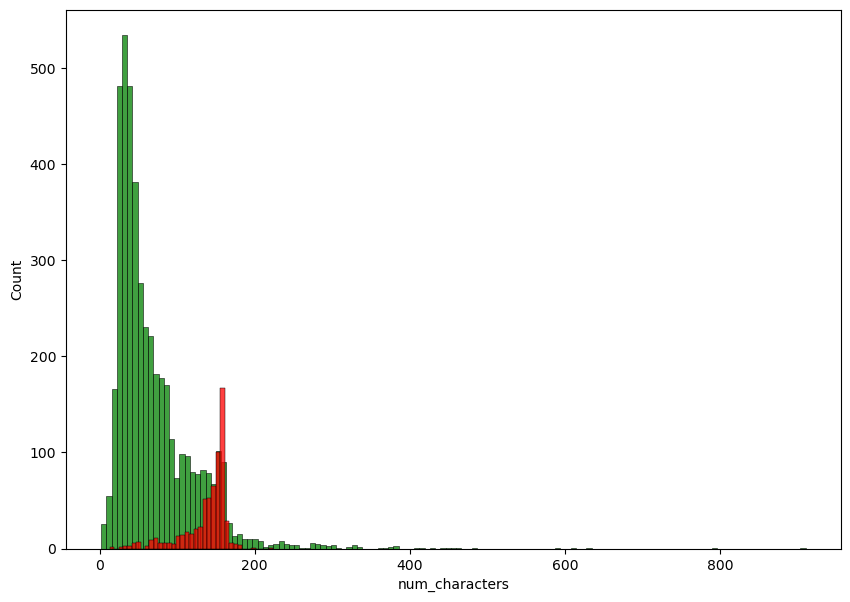

In [34]:
plt.figure(figsize=(10,7));
# The green represents the ham mails
sns.histplot(df[df['target']==0]['num_characters'],color='green')
# The red represents the spam mails
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

## Number Of Words

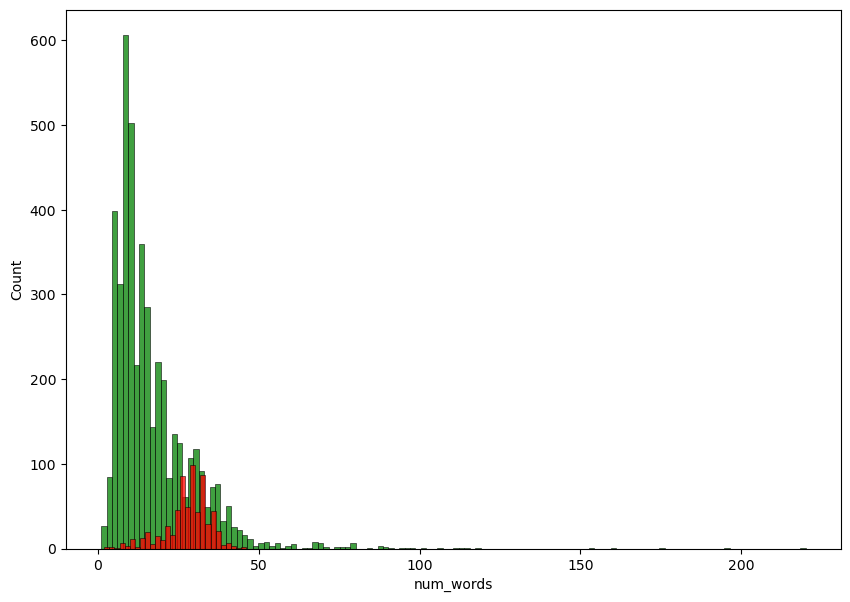

In [35]:
plt.figure(figsize=(10,7));
# The green represents the ham mails
sns.histplot(df[df['target']==0]['num_words'],color='green')
# The red represents the spam mails
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

## Number Of Characters

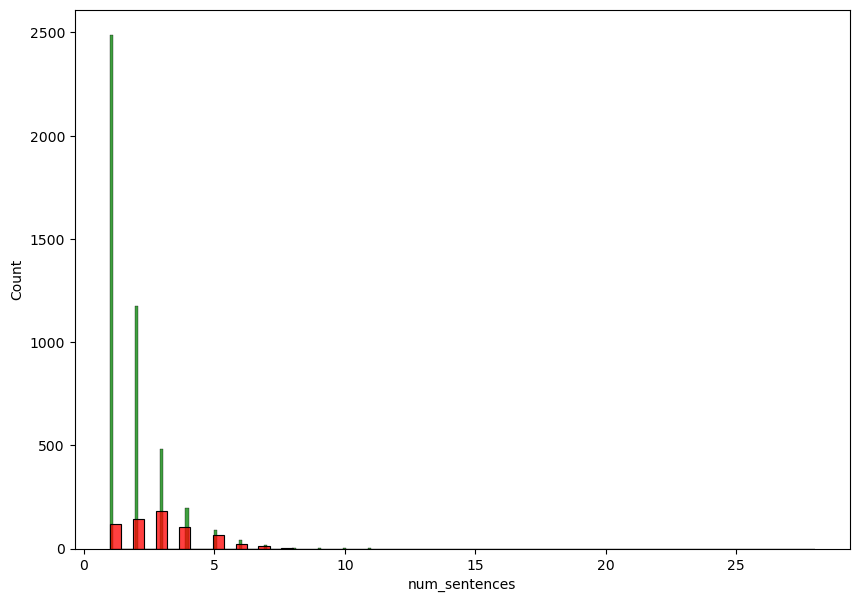

In [36]:
plt.figure(figsize=(10,7));
# The green represents the ham mails
sns.histplot(df[df['target']==0]['num_sentences'],color='green')
# The red represents the spam mails
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

## General Graphs for Observation 

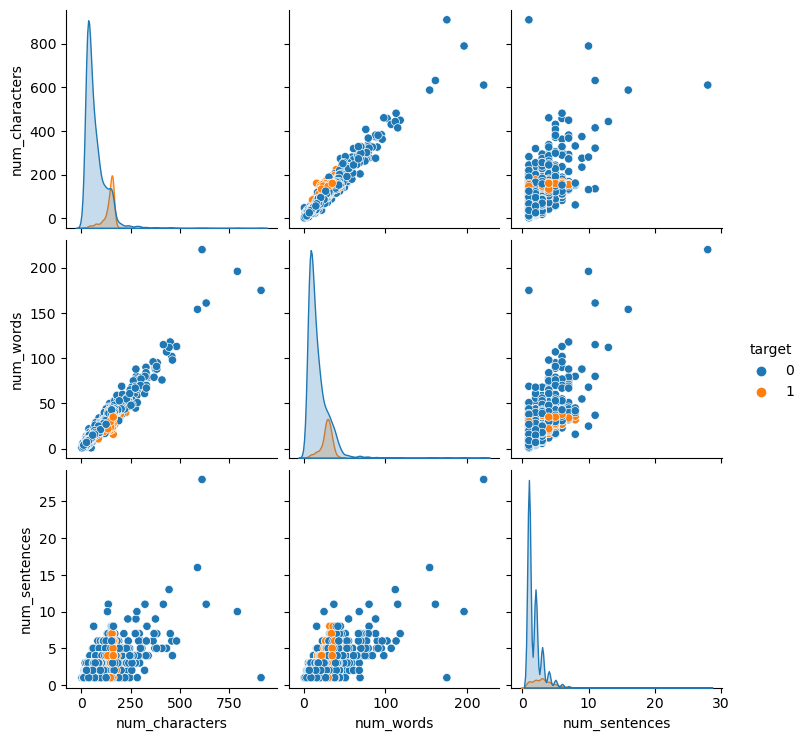

In [37]:
sns.pairplot(df,hue='target')

## Heatmap For Eye Catch

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

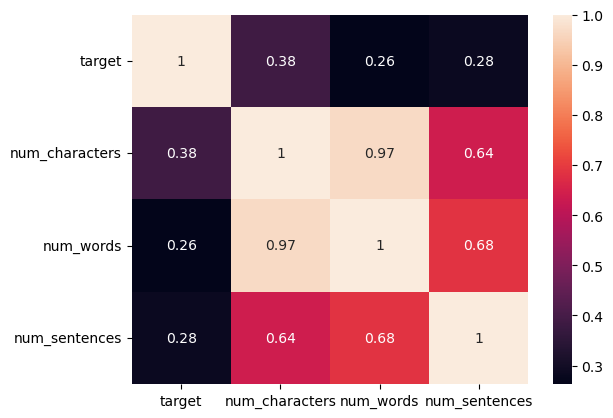

In [39]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing speical characters
* Removing stop words and punctuation
* Stemming (the process of reducing a word to its word stem that affixes to suffixes and prefixes or the roots)

-----------------------------------------------------------------------------------------------

* The Following function will lower case the string and return an array with the tokens of the string each index representing a word

In [128]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean(text):
    # Lowering letters
    text = text.lower()
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]', '', text)
    # Removing numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)

    # Joining words
    text = (' '.join(filtered_sentence))
    return text

In [131]:
x =clean('Did you like my presentation of ML? I used 50% of my energy');
x

'like presentation ml used energy'

### PorterStemmer
* the Porter algorithm reduces the words “argue”, “argued”, “argues” and “arguing” to the stem “argu” which isn't an existing word.

In [77]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('eating');

In [132]:
df['transformed_text'] = df['text'].apply(clean);

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


### WordCloud
* A word cloud is a technique to show which words are the most frequent in the given text

In [134]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white');

In [135]:
#%pip install libfreetype6
#If you faced an error says that font is not supported 

In [136]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

* Those are the most frequent words in an spam mail

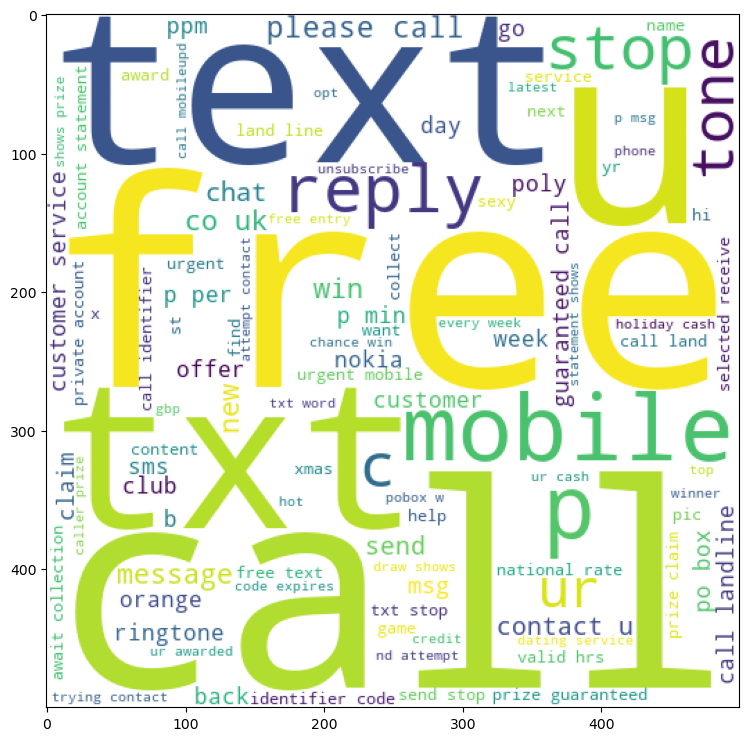

In [137]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc);

 * Those are the most frequent words in an spam mail


In [138]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

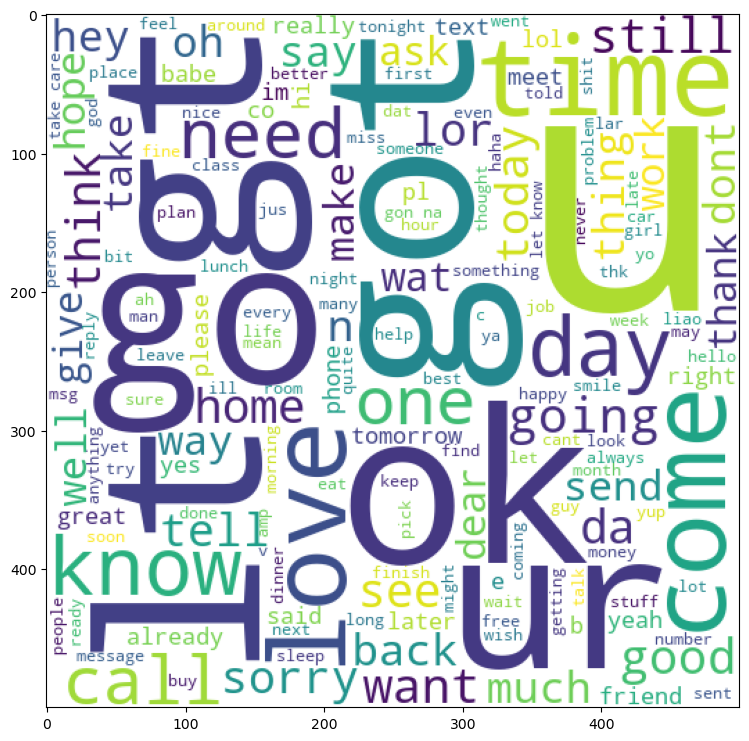

In [139]:
plt.figure(figsize=(12,9))
plt.imshow(ham_wc);

In [140]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


## Putting The Spam Words In A List

In [141]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word);

In [142]:
len(spam_corpus)

9996

## Collection Counter 
* This is equivalent ot map or unoredered_map in c++ where we map each word a key and the value of each key is the frequency of the words in the spam corpus array

In [143]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 197,
         'entry': 22,
         'wkly': 9,
         'comp': 8,
         'win': 56,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkts': 2,
         'st': 22,
         'may': 6,
         'text': 109,
         'receive': 27,
         'question': 6,
         'std': 7,
         'txt': 140,
         'rate': 25,
         'c': 56,
         'apply': 25,
         'freemsg': 14,
         'hey': 5,
         'darling': 2,
         'week': 46,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chgs': 1,
         'send': 59,
         'rcv': 4,
         'winner': 13,
         'valued': 8,
         'network': 23,
         'customer': 40,
         'selected': 21,
         'receivea': 1,
         'prize': 82,
         'reward': 10,
         'claim': 96,
         'call': 322,
         'code': 28,
         'kl': 1,
         'valid': 23,
         

In [144]:
# lets takde the most common 30 words in a spam mail
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,322
1,free,197
2,u,156
3,p,148
4,txt,140
5,ur,119
6,stop,114
7,mobile,111
8,text,109
9,claim,96


## Barplot Of Spam Words

In [145]:
plt.figure(figsize=(10,7));
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],ly=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha=0.8)

plt.xticks(rotation="vertical")
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1000x700 with 0 Axes>

In [146]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word);

In [147]:
len(ham_corpus)

35473

In [148]:
plt.figure(figsize=(10,7));
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x700 with 0 Axes>

## 4. Model Buidling

-----------------------------------------------------------------------------------------------------------------------------------------

## Sklearn.feature_extraction.text
* The sklearn. feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image."
* The process of converting text data into numbers is called Feature Extraction from the text. It is also called text vectorization.

* Computers store data as 0's and 1's – data that cannot be directly understood by humans. They interpret these data as instructions for displaying text, sound, images or videos that are meaningful to people.

* each individual letter or character must be represented by a unique binary pattern

---------

## CounterVectorizer Vs IfidVectorizer
* CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

In [282]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [283]:
x = tfidf.fit_transform(df['transformed_text']).toarray();

In [284]:
x.shape

(5169, 7527)

In [285]:
y = df['target'].values

## Train Test Split
* The Sklearn train_test_split function helps us create our training data and test data. This is because typically, the training data and test data come from the same original dataset. To get the data to build a model, we start with a single dataset, and then we split it into two datasets: train and test

In [286]:

from sklearn.model_selection import train_test_split

In [287]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)


## Naive Bayes 
* The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category.

### Type Of Naive Bayes Algorithms
1.  <font color="red">Bernoulli</font>
2.   <font color="red">Multinomial</font>
3.   <font color="red">Gaussian</font>


* Bernoulli Naive bayes is good at handling boolean/binary attributes, while Multinomial Naive bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values.


## The Difference Between Them
* We use algorithm based on the kind of dataset we have -

* Bernoulli Naive bayes is good at handling boolean/binary attributes, while Multinomial Naive bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values.

* Consider three scenarios:

* Consider a dataset which has columns like has_diabetes, has_bp, has_thyroid and then you classify the person as healthy or not. In such a scenario Bernoulli NB will work well.

* Consider a dataset that has marks of various students of various subjects and you want to predict, whether the student is clever or not. Then in this case multinomial NB will work fine.

* Consider a dataset that has weight of students and you are predicting height of them, then GaussiaNB will well in this case.

In [288]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [289]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Testing Performance 
* In this section we are trying to test the three algorithms and see which one will give the best performance.

---------

In [290]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8785769528228925
[[1002  126]
 [  31  134]]
0.5153846153846153


In [291]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9551430781129157
[[1128    0]
 [  58  107]]
1.0


In [292]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.962877030162413
[[1123    5]
 [  43  122]]
0.9606299212598425


In [293]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [301]:
c = 'contact me for free money, txt free'
clean_text = clean(c);

In [302]:
vector_input = tfidf.transform([c])
vector_input

<1x7527 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [303]:
result = mnb.predict(vector_input)
result

array([0])